## Death Rate vs. Enforcement

In [1]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # find digits in string

1.3.4


In [2]:
df = pd.read_pickle('Data/combined_ww.pkl')
#print(df.columns[100:200])
enforce = pd.read_csv('Data/Enforce.csv')
#print(df.columns[100:200])
enforce = enforce.rename(columns={'Period': 'Year'})
enforce16 = enforce[enforce['Year'] == 2016]
enforce16.head();
enforce16 = enforce16[["SpatialDimValueCode","Value"]]
enforce16 = enforce16.rename(columns={'Value': '2016', "SpatialDimValueCode": "Code"})
enforce16 = enforce16.set_index("Code")
enforce16.columns = ["EnforceBansTobaccoAd_"+str(x) for x in enforce16.columns]
enforce16.head()
#EnforceBansTobaccoAd_2010, 2007, 2012, 2014
#get 2016 from enforce.csv

df = pd.DataFrame().join([df, enforce16], how="outer")
death_enforce = df[["EnforceBansTobaccoAd_" + str(x) for x in (2007,2010,2012,2014,2016)]]

In [4]:
death = df[["deathRate_" + str(x) for x in (2007,2010,2012,2014,2016)]]
cbd_dropped = pd.DataFrame().join([death_enforce, death], how="outer")
print(cbd_dropped.shape)
cbd_dropped = cbd_dropped.dropna()
print(cbd_dropped.shape)
death = cbd_dropped[["deathRate_" + str(x) for x in (2007,2010,2012,2014,2016)]]
death_enforce = cbd_dropped[["EnforceBansTobaccoAd_" + str(x) for x in (2007,2010,2012,2014,2016)]]

(207, 10)
(185, 10)


In [5]:
for year in (2007,2010,2012,2014,2016):
    print(len(cbd_dropped['EnforceBansTobaccoAd_' + str(year)]))
type(cbd_dropped[['EnforceBansTobaccoAd_2016']])
for year in (2007,2010,2012,2014,2016):
    print(cbd_dropped[['EnforceBansTobaccoAd_' + str(year)]].value_counts().sort_index(ascending=True))

185
185
185
185
185
EnforceBansTobaccoAd_2007
2.0                          91
3.0                           3
4.0                          84
5.0                           7
dtype: int64
EnforceBansTobaccoAd_2010
2.0                          72
3.0                           1
4.0                          96
5.0                          16
dtype: int64
EnforceBansTobaccoAd_2012
2.0                           63
3.0                            1
4.0                          100
5.0                           21
dtype: int64
EnforceBansTobaccoAd_2014
2.0                           55
3.0                            1
4.0                          101
5.0                           28
dtype: int64
EnforceBansTobaccoAd_2016
2.0                           15
3.0                           34
4.0                          111
5.0                           25
dtype: int64


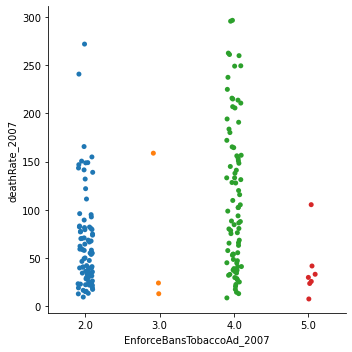

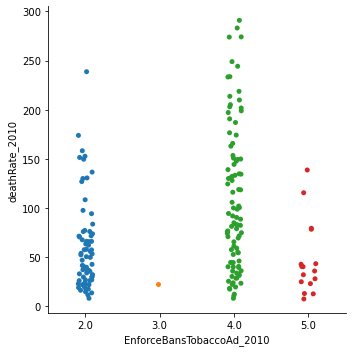

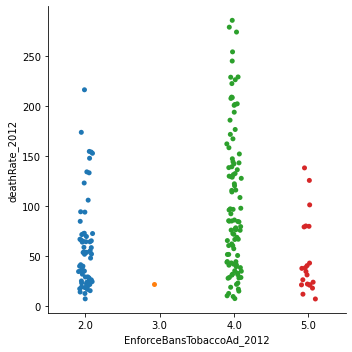

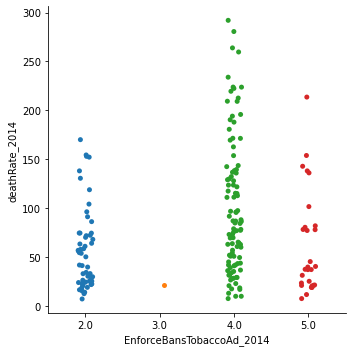

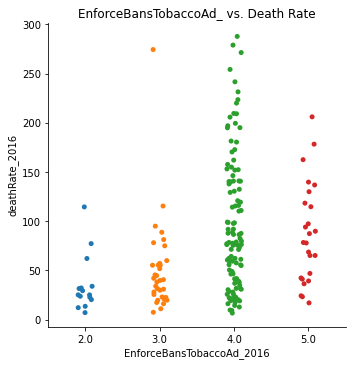

In [6]:
for year in (2007,2010,2012,2014,2016):
    sns.catplot(data = cbd_dropped,
                   x="EnforceBansTobaccoAd_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("EnforceBansTobaccoAd_ vs. Death Rate");

In [7]:
encoded = list()
for year in (2007,2010,2012,2014,2016):
    encoded.append(pd.get_dummies(death_enforce['EnforceBansTobaccoAd_' + str(year)])) 
#encoded = pd.DataFrame().join(encoded, how="outer")

In [8]:
from sklearn.linear_model import LinearRegression as lr

In [9]:
years = [2007,2010,2012,2014,2016]
for i in range(5):
    x = encoded[i]
    y = death["deathRate_" + str(years[i])]
    #print(x.shape)
    #print(y.shape)
    reg = lr().fit(x, y)
    print(reg.score(x, y))
    print(reg.coef_)
    #plt.scatter(x, y,color='g')
    #plt.plot(x, reg.predict(x),color='b')

0.1464514591590762
[ -6.01727022  -5.07700377  43.32444787 -32.23017389]
0.1524878264473346
[  0.63868889 -36.61509536  48.40506219 -12.42865572]
0.13852429571907532
[  1.87813799 -36.33149185  45.32558484 -10.87223099]
0.11620848972713482
[ -3.24772869 -39.03431539  40.75524415   1.52679993]
0.12117733121653096
[-32.38869079 -16.85525809  29.80241891  19.44152998]


## Tobacco Usage vs Enforcement

In [10]:
enforce18 = enforce[enforce['Year'] == 2018]
enforce18.head();
enforce18 = enforce18[["SpatialDimValueCode","Value"]]
enforce18 = enforce18.rename(columns={'Value': '2018', "SpatialDimValueCode": "Code"})
enforce18 = enforce18.set_index("Code")
enforce18.columns = ["EnforceBansTobaccoAd_"+str(x) for x in enforce18.columns]
enforce18.head()
#get 2018 from enforce.csv

df = pd.DataFrame().join([df, enforce18], how="outer")
usage_enforce = df[["EnforceBansTobaccoAd_" + str(x) for x in (2010, 2014, 2016, 2018)]]
#Both sexes_2010, 2014, 2016, 2018

In [29]:
new_years = [2010,2014,2016,2018]
usage = df[["Both sexes_" + str(x) for x in new_years]]
usage_cbd_dropped = pd.DataFrame().join([usage_enforce, usage], how="outer")
print(usage_cbd_dropped.shape)
usage_cbd_dropped = usage_cbd_dropped.dropna()
print(usage_cbd_dropped.shape)
usage = usage_cbd_dropped[["Both sexes_" + str(x) for x in new_years]]
usage_enforce = usage_cbd_dropped[["EnforceBansTobaccoAd_" + str(x) for x in new_years]]
print(usage.shape)
print(usage_enforce.shape)

(207, 8)
(149, 8)
(149, 4)
(149, 4)


In [30]:
for year in new_years:
    print(len(usage_cbd_dropped['EnforceBansTobaccoAd_' + str(year)]))
type(usage_cbd_dropped[['EnforceBansTobaccoAd_2016']])
for year in new_years:
    print(usage_cbd_dropped[['EnforceBansTobaccoAd_' + str(year)]].value_counts().sort_index(ascending=True))

149
149
149
149
EnforceBansTobaccoAd_2010
2.0                          50
4.0                          85
5.0                          14
dtype: int64
EnforceBansTobaccoAd_2014
2.0                          36
4.0                          89
5.0                          24
dtype: int64
EnforceBansTobaccoAd_2016
2.0                          10
3.0                          21
4.0                          93
5.0                          25
dtype: int64
EnforceBansTobaccoAd_2018
2.0                          11
3.0                          22
4.0                          93
5.0                          23
dtype: int64


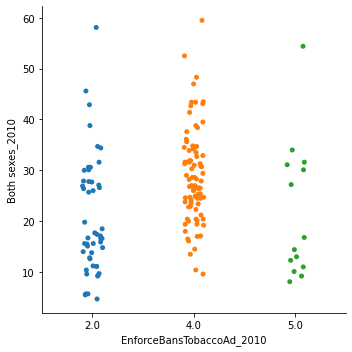

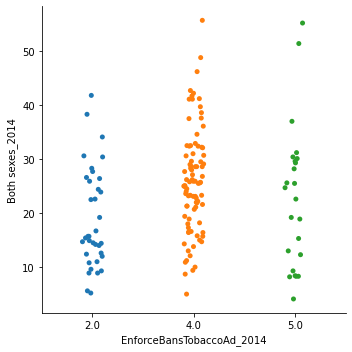

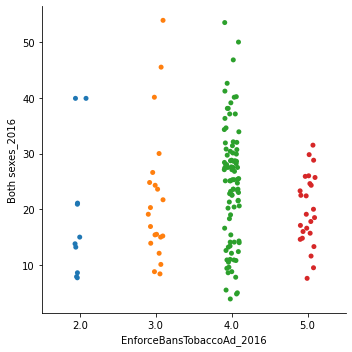

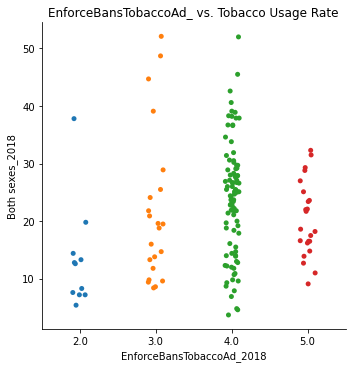

In [18]:
for year in new_years:
    sns.catplot(data = usage_cbd_dropped,
                   x="EnforceBansTobaccoAd_" + str(year),
                   y="Both sexes_" + str(year),
                    label =year)
plt.title("EnforceBansTobaccoAd_ vs. Tobacco Usage Rate");

In [31]:
usage_encoded = list()
for year in new_years:
    usage_encoded.append(pd.get_dummies(usage_enforce['EnforceBansTobaccoAd_' + str(year)])) 

In [33]:
for i in range(4):
    x = usage_encoded[i]
    y = usage["Both sexes_" + str(new_years[i])]
    print(x.shape)
    print(y.shape)
    reg = lr().fit(x, y)
    print(reg.score(x, y))
    print(reg.coef_)
    #plt.scatter(x, y,color='g')
    #plt.plot(x, reg.predict(x),color='b')

(149, 3)
(149,)
0.12329824570177694
[-2.9589972   5.02970868 -2.07071148]
(149, 3)
(149,)
0.06991192790518175
[2.51970105e+15 2.51970105e+15 2.51970105e+15]
(149, 4)
(149,)
0.03896700715455359
[-2.45940092  0.70250384  3.136298   -1.37940092]
(149, 4)
(149,)
0.0771930574972185
[-6.51267532  1.9555065   4.01371765  0.54345117]


In [69]:
#linear graphs for average regression
#print(death.head())
#print(death_enforce.head())
#print(usage.head())
#print(usage_enforce.head())
avg_death = death.mean(axis = 1)
print(avg_death)
avg_death_enforce = death_enforce.mean(axis=1)
avg_usage = usage.mean(axis=1)
avg_usage_enforce = usage_enforce.mean(axis = 1)

#do the same for help to quit policy

Code
ARM    155.698530
AUS     89.778008
AUT    131.974583
AZE    108.665279
BEL    197.791992
          ...    
WSM     85.343908
YEM     40.157005
ZAF     69.291220
ZMB     28.526861
ZWE     70.598880
Length: 185, dtype: float64


ARM    155.698530
AUS     89.778008
AUT    131.974583
AZE    108.665279
BEL    197.791992
          ...    
WSM     85.343908
YEM     40.157005
ZAF     69.291220
ZMB     28.526861
ZWE     70.598880
Name: Average Death, Length: 185, dtype: float64
0.07539542814392375
[[21.96460668]]


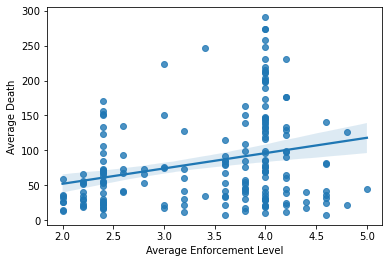

In [70]:
x = avg_death_enforce.to_numpy().reshape((-1, 1))
y = avg_death.to_numpy().reshape((-1, 1))
cbd_avg_death = pd.DataFrame().join([avg_death, avg_death_enforce], how="outer")
cbd_avg_death = cbd_avg_death.rename(columns={0: 'Average Death', 1: "Average Enforcement Level"})
print(cbd_avg_death["Average Death"])
#print(x.shape)
#print(y.shape)
avg_reg = lr().fit(x, y)
print(avg_reg.score(x, y))
print(avg_reg.coef_)
sns.regplot(x="Average Enforcement Level", y="Average Death", data=cbd_avg_death);

0.05337214871255025
[[3.87920999]]


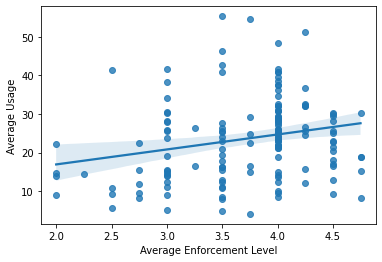

In [71]:
x = avg_usage_enforce.to_numpy().reshape((-1, 1))
y = avg_usage.to_numpy().reshape((-1, 1))
cbd_avg_usage = pd.DataFrame().join([avg_usage, avg_usage_enforce], how="outer")
cbd_avg_usage = cbd_avg_usage.rename(columns={0: 'Average Usage', 1: "Average Enforcement Level"})

avg_reg = lr().fit(x, y)
print(avg_reg.score(x, y))
print(avg_reg.coef_)
sns.regplot(x="Average Enforcement Level", y="Average Usage", data=cbd_avg_usage);

In [72]:
pd.to_pickle(df,"Data/combined_enforce.pkl")